## Image clasification for identifying zones of interest

In [2]:
# import data processing libraries
import numpy as np
from scipy import signal
from scipy import interpolate
from scipy.optimize import minimize
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# Import image processing  libraries
import skimage
import skimage.io as io
from skimage.color import rgb2lab, lab2rgb
from skimage import morphology
import cv2

# Import plotting libraries
from matplotlib.patches import Ellipse
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib widget

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


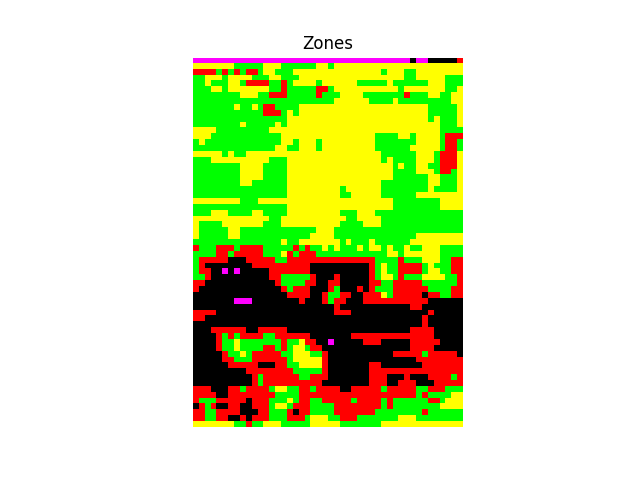

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


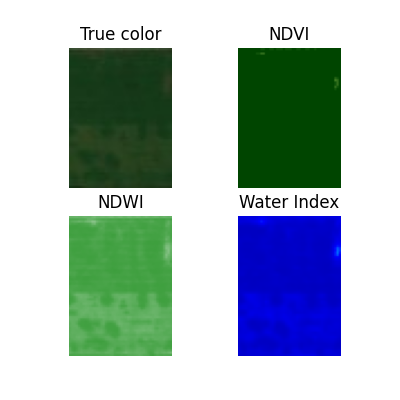

In [38]:
plt.close('all')
# load images
true_color = io.imread("../24hstartup/image set 1/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_True_color.jpg")
ndvi = io.imread("../24hstartup/image set 1/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_NDVI.png")
ndwi = io.imread("../24hstartup/image set 1/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_NDWI.png")
water_index = io.imread("../24hstartup/image set 1/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_Moisture_index.png")

# # load images
# true_color = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_True_color (1).png")
# ndvi = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_NDVI (1).png")
# ndwi = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_NDWI (1).png")
# water_index = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_Moisture_index (1).png")

fig, axes = plt.subplots(2, 2, figsize=(4, 4))
ax = axes.ravel()

# Display original images
ax[0].imshow(true_color)
ax[0].set_title("True color")
ax[0].axis("Off")
ax[1].imshow(ndvi)
ax[1].set_title("NDVI")
ax[1].axis("Off")
ax[2].imshow(ndwi)
ax[2].set_title("NDWI")
ax[2].axis("Off")
ax[3].imshow(water_index)
ax[3].set_title("Water Index")
ax[3].axis("Off")


# Make images gray scale
true_color = rgb2lab(true_color)
ndvi = rgb2lab(true_color)
ndwi = rgb2lab(true_color)
water_index = rgb2lab(true_color)

# ax[0].imshow(true_color)
# ax[0].set_title("True color")
# ax[1].imshow(ndvi, cmap="YlGn")
# ax[1].set_title("NDVI")
# ax[1].imshow(ndvi, cmap="blue")
# ax[1].set_title("NDWI")
# ax[1].imshow(ndvi, cmap="spectral")
# ax[1].set_title("Water Index")


# input_image = np.array(input_image, dtype=np.float64)/255
# input_image = input_image[:,:,0]

# Make image cube with different channels
w, h, d = original_shape = tuple(true_color.shape)
image_cube = np.zeros((w,h,4))
image_cube[:,:,0] = true_color[:,:,0]
image_cube[:,:,1] = ndvi[:,:,1]
image_cube[:,:,2] = ndwi[:,:,1]
image_cube[:,:,3] = water_index[:,:,1]

# Make 4D cube into a nx4 array
image_cube_reshape = np.reshape(image_cube, (w*h,4))

# There are 5 priority zones that we are looking into
n_zones = 5
# Make clasification model
kmeans_zones = KMeans(n_clusters=5, random_state=0).fit(image_cube_reshape)
segmentation_zones = kmeans_zones.predict(image_cube_reshape).reshape(w, h)

# Make color image for better visuallization
segmented_image =  np.zeros_like(true_color)
segmented_image[segmentation_zones == 0] =  (0,0,0)  # Sunlit leaves
segmented_image[segmentation_zones == 1] =  (255,255,0) # High Scouting Score
segmented_image[segmentation_zones == 2] =  (255,0,0) # Medium Scouting Score
segmented_image[segmentation_zones == 3] =  (255,0,255) # Low scouting score
segmented_image[segmentation_zones == 4] =  (0,255,0) # Dark background


# Display classification
plt.figure()
plt.imshow(segmented_image, cmap='turbo')
plt.title('Zones')
plt.axis('off')
# plt.colorbar()
plt.show() 

# # Display imave overlay
# plt.figure()
# plt.imshow(segmented_image)
# plt.imshow(true_color , cmap='turbo', alpha=0.25)
# plt.title('Zones')
# plt.axis('off')
# # plt.colorbar()
# plt.show() 


# Save image
io.imsave('../24hstartup/image set 1/zones.png',segmented_image)
    


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


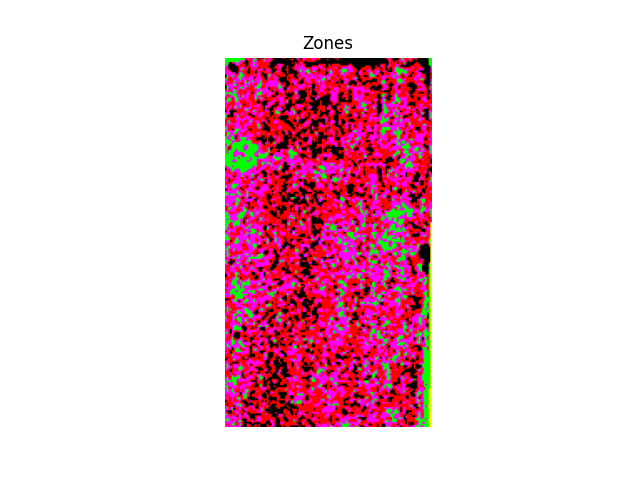

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


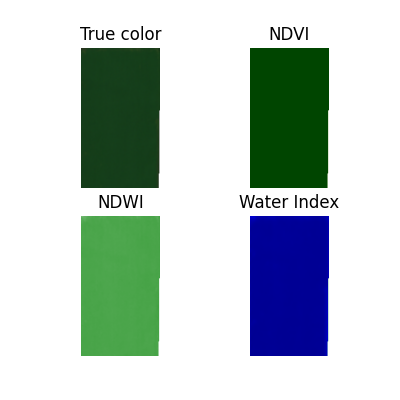

In [37]:
plt.close('all')
# load images
true_color = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_True_color.png")
ndvi = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_NDVI (1).png")
ndwi = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_NDWI (1).png")
water_index = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_Moisture_index (1).png")

# # load images
# true_color = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_True_color (1).png")
# ndvi = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_NDVI (1).png")
# ndwi = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_NDWI (1).png")
# water_index = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_Moisture_index (1).png")

fig, axes = plt.subplots(2, 2, figsize=(4, 4))
ax = axes.ravel()

# Display original images
ax[0].imshow(true_color)
ax[0].set_title("True color")
ax[0].axis("Off")
ax[1].imshow(ndvi)
ax[1].set_title("NDVI")
ax[1].axis("Off")
ax[2].imshow(ndwi)
ax[2].set_title("NDWI")
ax[2].axis("Off")
ax[3].imshow(water_index)
ax[3].set_title("Water Index")
ax[3].axis("Off")


# Make images gray scale
true_color = rgb2lab(true_color[:,:,0:3])
ndvi = rgb2lab(true_color[:,:,0:3])
ndwi = rgb2lab(true_color[:,:,0:3])
water_index = rgb2lab(true_color[:,:,0:3])

# ax[0].imshow(true_color)
# ax[0].set_title("True color")
# ax[1].imshow(ndvi, cmap="YlGn")
# ax[1].set_title("NDVI")
# ax[1].imshow(ndvi, cmap="blue")
# ax[1].set_title("NDWI")
# ax[1].imshow(ndvi, cmap="spectral")
# ax[1].set_title("Water Index")


# input_image = np.array(input_image, dtype=np.float64)/255
# input_image = input_image[:,:,0]

# Make image cube with different channels
w, h, d = original_shape = tuple(true_color.shape)
image_cube = np.zeros((w,h,4))
image_cube[:,:,0] = true_color[:,:,0]
image_cube[:,:,1] = ndvi[:,:,1]
image_cube[:,:,2] = ndwi[:,:,1]
image_cube[:,:,3] = water_index[:,:,1]

# Make 4D cube into a nx4 array
image_cube_reshape = np.reshape(image_cube, (w*h,4))

# There are 5 priority zones that we are looking into
n_zones = 5
# Make clasification model
kmeans_zones = KMeans(n_clusters=5, random_state=0).fit(image_cube_reshape)
segmentation_zones = kmeans_zones.predict(image_cube_reshape).reshape(w, h)

# Make color image for better visuallization
segmented_image =  np.zeros_like(true_color)
segmented_image[segmentation_zones == 0] =  (0,0,0)  # Sunlit leaves
segmented_image[segmentation_zones == 1] =  (255,255,0) # High Scouting Score
segmented_image[segmentation_zones == 2] =  (255,0,0) # Medium Scouting Score
segmented_image[segmentation_zones == 3] =  (255,0,255) # Low scouting score
segmented_image[segmentation_zones == 4] =  (0,255,0) # Dark background


# Display classification
plt.figure()
plt.imshow(segmented_image, cmap='turbo')
plt.title('Zones')
plt.axis('off')
# plt.colorbar()
plt.show() 

# Save image
io.imsave('../24hstartup/image set 2/zones.png',segmented_image)

    


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


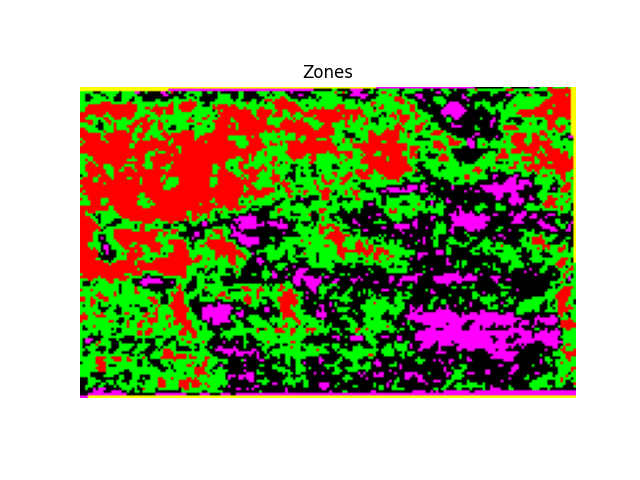

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


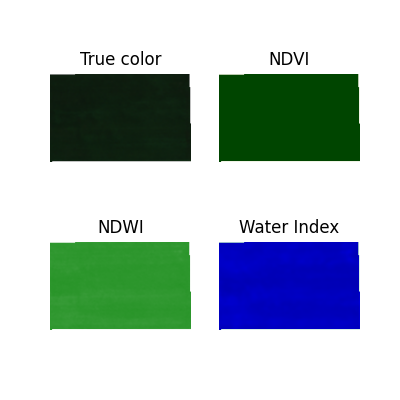

In [39]:
plt.close('all')
# load images
true_color = io.imread("../24hstartup/image set test/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_True_color.png")
ndvi = io.imread("../24hstartup/image set test/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_NDVI.png")
ndwi = io.imread("../24hstartup/image set test/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_NDWI.png")
water_index = io.imread("../24hstartup/image set test/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_Moisture_index.png")

# # load images
# true_color = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_True_color (1).png")
# ndvi = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_NDVI (1).png")
# ndwi = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_NDWI (1).png")
# water_index = io.imread("../24hstartup/image set 2/2022-07-20-00_00_2022-07-20-23_59_Sentinel-2_L2A_Moisture_index (1).png")

fig, axes = plt.subplots(2, 2, figsize=(4, 4))
ax = axes.ravel()

# Display original images
ax[0].imshow(true_color)
ax[0].set_title("True color")
ax[0].axis("Off")
ax[1].imshow(ndvi)
ax[1].set_title("NDVI")
ax[1].axis("Off")
ax[2].imshow(ndwi)
ax[2].set_title("NDWI")
ax[2].axis("Off")
ax[3].imshow(water_index)
ax[3].set_title("Water Index")
ax[3].axis("Off")


# Make images gray scale
true_color = rgb2lab(true_color[:,:,0:3])
ndvi = rgb2lab(true_color[:,:,0:3])
ndwi = rgb2lab(true_color[:,:,0:3])
water_index = rgb2lab(true_color[:,:,0:3])

# ax[0].imshow(true_color)
# ax[0].set_title("True color")
# ax[1].imshow(ndvi, cmap="YlGn")
# ax[1].set_title("NDVI")
# ax[1].imshow(ndvi, cmap="blue")
# ax[1].set_title("NDWI")
# ax[1].imshow(ndvi, cmap="spectral")
# ax[1].set_title("Water Index")


# input_image = np.array(input_image, dtype=np.float64)/255
# input_image = input_image[:,:,0]

# Make image cube with different channels
w, h, d = original_shape = tuple(true_color.shape)
image_cube = np.zeros((w,h,4))
image_cube[:,:,0] = true_color[:,:,0]
image_cube[:,:,1] = ndvi[:,:,1]
image_cube[:,:,2] = ndwi[:,:,1]
image_cube[:,:,3] = water_index[:,:,1]

# Make 4D cube into a nx4 array
image_cube_reshape = np.reshape(image_cube, (w*h,4))

# There are 5 priority zones that we are looking into
n_zones = 5
# Make clasification model
kmeans_zones = KMeans(n_clusters=5, random_state=0).fit(image_cube_reshape)
segmentation_zones = kmeans_zones.predict(image_cube_reshape).reshape(w, h)

# Make color image for better visuallization
segmented_image =  np.zeros_like(true_color)
segmented_image[segmentation_zones == 0] =  (0,0,0)  # Sunlit leaves
segmented_image[segmentation_zones == 1] =  (255,255,0) # High Scouting Score
segmented_image[segmentation_zones == 2] =  (255,0,0) # Medium Scouting Score
segmented_image[segmentation_zones == 3] =  (255,0,255) # Low scouting score
segmented_image[segmentation_zones == 4] =  (0,255,0) # Dark background


# Display classification
plt.figure()
plt.imshow(segmented_image, cmap='turbo')
plt.title('Zones')
plt.axis('off')
# plt.colorbar()
plt.show() 

# Save image
io.imsave('../24hstartup/image set test/zones.png',segmented_image)